In [1]:
#//*************************************************************************
#//*** Downloads Stock Data and converts the returns to a dataframe,
#//*** which saves a compressed CSV file in the stocks folder
#//*************************************************************************
import json
import requests
import time
import pandas as pd
import platform
import csv
import numpy as np
import playsound
from IPython.display import clear_output

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from matplotlib import pyplot as plt


sound_filename = "sms-alert-4-daniel_simon.mp3"
#playsound.playsound(sound_filename)

#//*********************************************************************************
#//*** Read the API keys from a JSON encoded file
#//*** Located in the ignore_folder sub directory
#//*** This Folder is added to the .gitignore file and does not show up on Github
#//*** This is Authentication Best Practices for Github
#//*********************************************************************************
f = open("./ignore_folder/alpha_vantage_api.json", "r")

#//*** Fugley Pythonic type conversion
#//*** Loads the file into Dictionary via JSON.loads
#//*** Gets the API key value using the 'api' key
#//*** prepends apikey= so the resulting value is URL ready :]
av_apikey = json.loads(f.read())['apikey']
f.close()

#//*** Load the Stock Tickers
f = open(".\\data\\stock_tickers_ape.json", "r")
symbols = json.loads(f.read())['symbols']

#//*** Just get amc for testing
#symbols = [ "bb" ]

symbols = ['ATOS','SPY','NVCN','CTXR','ACST','DNN','AMD','SPRT','TDA','SENS','IMTE','GSAT','GNUS','AL','XELA','ZOM','WPRT','WHLR','TY','TTOO','TNXP','TBLT','SWI','SQBG','SNMP','RS','TSLA','RGLS','POWW','OIL','OI','OCGN','NRBO','NOC','NET','MVIS','MU','MSM','MSFT','MRNA','MMT','MIK','METX','LODE','LMT','IQ','IBKR','HGEN','GORO','GL','GE','FUV','FSR','CORT','CLOV','CFMS','CEI','BYSI','BTG','BNGO','BLNK','AUMN','ATVI','ASRT','AAPL','AMC','ASM','FAMI','CRTD','PT']
symbols = ['rkt']
symbols = ['SABR']
symbols = ['DIDI']
symbols = ['sabr','ATOS','DIDI','SPY','NVCN','CTXR','ACST','DNN','AMD','SPRT','TDA','SENS','IMTE','GSAT','GNUS','AL','XELA','ZOM','WPRT','WHLR','TY','TTOO','TNXP','TBLT','SWI','SQBG','SNMP','RS','TSLA','RGLS','POWW','OIL','OI','OCGN','NRBO','NOC','NET','MVIS','MU','MSM','MSFT','MRNA','MMT','MIK','METX','LODE','LMT','IQ','IBKR','HGEN','GORO','GL','GE','FUV','FSR','CORT','CLOV','CFMS','CEI','BYSI','BTG','BNGO','BLNK','AUMN','ATVI','ASRT','AAPL','AMC','ASM','FAMI','CRTD','PT']#symbols = ['eth']
symbols = ['AAPL']#symbols = ['eth']
#symbols = ['SABR']
print(symbols)

['AAPL']


In [79]:
try:
    symbol
except:
    symbol = symbols[0]
    action = "daily"
input_filename = f"./stocks/{symbol}_{action}.csv.zip"

#//*** Convert Path to Mac formatting if needed
#if platform.system() == 'Darwin':
    #output_filename = output_filename.replace("\\","/")


print(f"Reading dataframe from File: {input_filename}")
out_df = pd.read_csv(input_filename)

out_df = out_df.sort_values(by='date',ascending=True)
out_df = out_df.reset_index(drop=True)
out_df['date'] = pd.to_datetime(out_df['date'])
print(out_df)
cl = out_df['close'].astype('float32')
train = cl[0:int(len(cl)*0.80)]
scl = MinMaxScaler()
#Scale the data
scl.fit(train.values.reshape(-1,1))
cl =scl.transform(cl.values.reshape(-1,1))
#Create a function to process the data into lb observations look back slices
# and create the train test dataset (90-10)
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
lb=10
X,y = processData(cl,lb)
X_train,X_test = X[:int(X.shape[0]*0.90)],X[int(X.shape[0]*0.90):]
y_train,y_test = y[:int(y.shape[0]*0.90)],y[int(y.shape[0]*0.90):]
print(X_train.shape[0],X_train.shape[1])
print(X_test.shape[0], X_test.shape[1])
print(y_train.shape[0])
print(y_test.shape[0])

#Build the model
model = keras.models.Sequential()
model.add(layers.LSTM(256,input_shape=(lb,1)))
model.add(layers.Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
#history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)
history = model.fit(X_train,y_train,epochs=300,shuffle=False)
model.summary() 

playsound.playsound(sound_filename)

Reading dataframe from File: ./stocks/AAPL_daily.csv.zip
           date symbol    open    high     low   close     volume
0    1999-11-01   AAPL   80.00   80.69   77.37   77.62    2487300
1    1999-11-02   AAPL   78.00   81.69   77.31   80.25    3564600
2    1999-11-03   AAPL   81.62   83.25   81.00   81.50    2932700
3    1999-11-04   AAPL   82.06   85.37   80.62   83.62    3384700
4    1999-11-05   AAPL   84.62   88.37   84.00   88.31    3721500
...         ...    ...     ...     ...     ...     ...        ...
5626 2022-03-11   AAPL  158.93  159.28  154.50  154.73   96970102
5627 2022-03-14   AAPL  151.45  154.12  150.10  150.62  108732111
5628 2022-03-15   AAPL  150.90  155.57  150.38  155.09   92964302
5629 2022-03-16   AAPL  157.05  160.00  154.46  159.59  102300157
5630 2022-03-17   AAPL  158.61  161.00  157.63  160.62   75615376

[5631 rows x 7 columns]
5058 10
562 10
5058
562
Epoch 1/300
159/159 [==============================] - 4s 13ms/step - loss: 0.0019:
Epoch 2/300
159/15

159/159 [==============================] - 2s 12ms/step - loss: 2.3934e-04
Epoch 177/300
159/159 [==============================] - 2s 12ms/step - loss: 1.8163e-04
Epoch 178/300
159/159 [==============================] - 2s 12ms/step - loss: 2.4043e-04
Epoch 179/300
159/159 [==============================] - 2s 12ms/step - loss: 1.8154e-04
Epoch 180/300
159/159 [==============================] - 2s 12ms/step - loss: 2.4008e-04
Epoch 181/300
159/159 [==============================] - 2s 12ms/step - loss: 1.8112e-04
Epoch 182/300
159/159 [==============================] - 2s 12ms/step - loss: 2.3803e-04
Epoch 183/300
159/159 [==============================] - 2s 12ms/step - loss: 1.8086e-04
Epoch 184/300
159/159 [==============================] - 2s 12ms/step - loss: 2.3622e-04
Epoch 185/300
159/159 [==============================] - 2s 12ms/step - loss: 1.8043e-04
Epoch 186/300
159/159 [==============================] - 2s 12ms/step - loss: 2.3535e-04
Epoch 187/300
159/159 [============

Text(0.5, 1.0, 'Train Dataset')

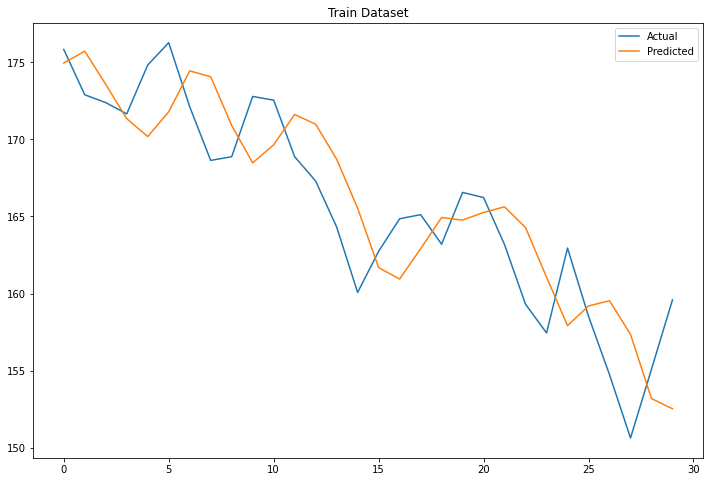

In [76]:
#//*** 20 Epochs
plt.figure(figsize=(12,8))
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)[-30:]), label="Actual")
plt.plot(scl.inverse_transform(Xt)[-30:], label="Predicted")
plt.legend()
plt.title("Train Dataset")


Text(0.5, 1.0, 'Train Dataset')

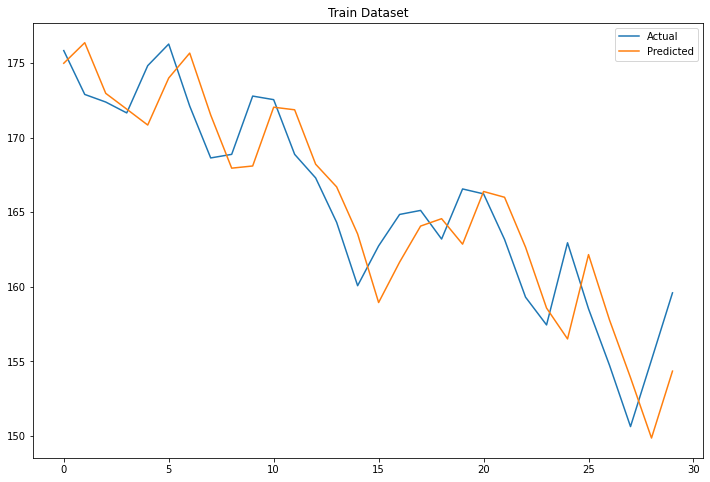

In [80]:
#//*** 300 Epochs
plt.figure(figsize=(12,8))
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)[-30:]), label="Actual")
plt.plot(scl.inverse_transform(Xt)[-30:], label="Predicted")
plt.legend()
plt.title("Train Dataset")


In [2]:
#Create a function to process the data into lb observations look back slices
# and create the train test dataset (90-10)
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)

def build_model(num_layers,lb,activation):
    model = keras.models.Sequential()
    #model.add(layers.LSTM(num_layers,activation=activation, input_shape=(lb,1)))
    
    #//*** Hidden Layers Don't seem to be the answer
    model.add(layers.LSTM(num_layers,activation=activation,return_sequences=True, input_shape=(lb,1)))
    #model.add(layers.LSTM(num_layers,activation=activation,return_sequences=True) )
    model.add(layers.LSTM(num_layers,activation=activation) )
    model.add(layers.Dense(1))
    model.compile(optimizer='adam',loss='mse')
    
    return model
    
#//**** Model Parameters
mp = {
    'size' : 120, #//*** Total number of days to model
    'lb' : 10, #//*** Look Back, how many days prior to consider as part of the LSTM model
    'layers' : 256,
    'epochs' : 500,
    'months_to_model' : 7,
    'activation' : 'relu',
}
#running_loss
hp = {
    'rolling' : 10,
    'rolling_means' : [],
    'rolling_dif' : [],
}

try:
    symbol
except:
    symbol = symbols[0]
    action = "daily"
input_filename = f"./stocks/{symbol}_{action}.csv.zip"

#//*** Convert Path to Mac formatting if needed
#if platform.system() == 'Darwin':
    #output_filename = output_filename.replace("\\","/")


print(f"Reading dataframe from File: {input_filename}")
out_df = pd.read_csv(input_filename)

out_df = out_df.sort_values(by='date',ascending=True)
out_df = out_df.reset_index(drop=True)
out_df['date'] = pd.to_datetime(out_df['date']).dt.date

#month_offset = int(int(mp['size'] / 30)*2)
#print("month_offset:",month_offset)
out_df = out_df[ out_df['date'] >= out_df['date'].max()-pd.DateOffset(months=mp['months_to_model']) ]
#out_df = out_df[ out_df['date'] >= out_df['date'].max()-pd.DateOffset(months=month_offset) ]
#out_df = out_df[ out_df['date'] >= out_df['date'].max()-pd.DateOffset(days=day_offset) ]
print(out_df)



#cl = out_df['close'].astype('float32')

#//*** Start with first Item
#base_index = 0

#//*** Collect range of data between base_index and mp['size']
#max_index = base_index + mp['size']

#cl = out_df.iloc[base_index:max_index]['close'].astype('float32')
#cl = out_df.iloc[base_index:max_index]

#///**** Value to Predict is the max_index
#y_test = out_df.iloc[max_index]['close'].astype('float32')
#print(cl)
#print(cl)
#print("Last")
#print(out_df.iloc[max_index-1])
#print("Predict")
#print(out_df.iloc[max_index])
predictions = []
actuals = []
predict_date = []
max_loop = len(out_df)-mp['size'] - 1
start_time = time.time()
print("1 /",max_loop)
print(range(0,len(out_df)-mp['size']))
for loop_index in range(0,len(out_df)-mp['size']):
    #print(loop_index,"/",max_loop)
    loop_time = time.time()
    #//*** Collect range of data between base_index and mp['size']
    max_index = loop_index + mp['size']
    
    cl = out_df.iloc[loop_index:max_index]['close'].astype('float32')
    y_test = out_df.iloc[max_index]['close'].astype('float32')

    
    #//*** Scale the Data between 0 and 1
    scl = MinMaxScaler()

    #//*** Scale and reshape the data. Each value is returned as a list within a list
    cl = scl.fit_transform(cl.values.reshape(-1,1))
    #cl = cl.values.reshape(-1,1)
    #print(cl)
    
    #//*** Build Data for Lookback arrays
    X_train,y_train = processData(cl,mp['lb'])

    #print("== X ==")
    #print(X_train)
    #print("== y ==")
    #print(y_train)

    #print(X_train.shape,y_train.shape)
    
    #//*** Build the test value using the last element of X_train
    x_test = X_train[-1]

    #//*** Remove the first element
    x_test = np.delete(x_test,0)
    #//*** Add the last element of y_train, as our predict ahead
    x_test = np.append(x_test,y_train[-1])
    
    disp_x_train = X_train
    

    
    X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
    #X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
    #Fit model with history to check for overfitting

    #//*** Reshape x_test to match the X_train shape
    x_test = X_train[-1].reshape((X_train[-1].shape[1],X_train[-1].shape[0],1))

    #model.summary() 

    
    
    

    
    
    
    
    
    model = build_model(mp['layers'],mp['lb'],mp['activation'])

        
    model.fit(X_train,y_train,epochs=mp['epochs'],shuffle=False,verbose=0)
    
    Xt = model.predict(x_test)
    
    predict = scl.inverse_transform(Xt)[0][0]
    predictions.append(predict)
    actuals.append(y_test)
    predict_date.append(out_df.iloc[max_index]['date'])
    remain_loop = max_loop - loop_index
    cycle_time = int(time.time() - loop_time)
    
    clear_output(wait=True)
    print(loop_index,"/",max_loop,"[",predict,"] - ",y_test, " ",cycle_time, "s - remaining: ",cycle_time*remain_loop,"s" )
    print("======")
    #break
    #    #break
    
    if True: #//*** Print as needed
        print(out_df.iloc[loop_index:max_index])

        print("X_Train")
        
        #print(scl.inverse_transform(x_test.reshape(-1,1)).reshape(1,-1))
        for n in scl.inverse_transform(disp_x_train)[-10:]:
            print(n[-5:])
        print("Y_train")
        print(scl.inverse_transform(y_train.reshape(-1,1))[-10:])
        print("X_test")
        print(scl.inverse_transform(x_test.reshape(-1,1)).reshape(1,-1))
        print("Actual:")
        print(out_df.iloc[max_index])
        print("y_test:",y_test)
        print(out_df.iloc[max_index]['date'])

total_time = int(time.time() - start_time)


print("=================")
print("DONE: ", total_time,"secs")
print("=================")
playsound.playsound(sound_filename)


    Error 277 for command:
        open sms-alert-4-daniel_simon.mp3
    A problem occurred in initializing MCI.

    Error 263 for command:
        close sms-alert-4-daniel_simon.mp3
    The specified device is not open or is not recognized by MCI.
Failed to close the file: sms-alert-4-daniel_simon.mp3


27 / 27 [ 157.98721 ] -  160.62   50 s - remaining:  0 s
            date symbol    open      high     low   close     volume
5510  2021-09-24   AAPL  145.66  147.4701  145.56  146.92   53477869
5511  2021-09-27   AAPL  145.47  145.9600  143.82  145.37   74150729
5512  2021-09-28   AAPL  143.25  144.7500  141.69  141.91  108972340
5513  2021-09-29   AAPL  142.47  144.4500  142.03  142.83   74602044
5514  2021-09-30   AAPL  143.66  144.3780  141.28  141.50   89056664
...          ...    ...     ...       ...     ...     ...        ...
5625  2022-03-10   AAPL  160.20  160.3900  155.98  158.52  105342033
5626  2022-03-11   AAPL  158.93  159.2800  154.50  154.73   96970102
5627  2022-03-14   AAPL  151.45  154.1200  150.10  150.62  108732111
5628  2022-03-15   AAPL  150.90  155.5700  150.38  155.09   92964302
5629  2022-03-16   AAPL  157.05  160.0000  154.46  159.59  102300157

[120 rows x 7 columns]
X_Train
[162.74 164.85 165.12 163.2  166.56]
[164.85 165.12 163.2  166.56 166.23]
[165.12 1

PlaysoundException: 
    Error 277 for command:
        open sms-alert-4-daniel_simon.mp3
    A problem occurred in initializing MCI.

Run Time:  124 s
Total Models:  27
{'size': 120, 'lb': 10, 'layers': 256, 'epochs': 20, 'months_to_model': 7, 'activation': 'relu'}
[datetime.date(2022, 2, 7), datetime.date(2022, 2, 8), datetime.date(2022, 2, 9), datetime.date(2022, 2, 10), datetime.date(2022, 2, 11), datetime.date(2022, 2, 14), datetime.date(2022, 2, 15), datetime.date(2022, 2, 16), datetime.date(2022, 2, 17), datetime.date(2022, 2, 18), datetime.date(2022, 2, 22), datetime.date(2022, 2, 23), datetime.date(2022, 2, 24), datetime.date(2022, 2, 25), datetime.date(2022, 2, 28), datetime.date(2022, 3, 1), datetime.date(2022, 3, 2), datetime.date(2022, 3, 3), datetime.date(2022, 3, 4), datetime.date(2022, 3, 7), datetime.date(2022, 3, 8), datetime.date(2022, 3, 9), datetime.date(2022, 3, 10), datetime.date(2022, 3, 11), datetime.date(2022, 3, 14), datetime.date(2022, 3, 15), datetime.date(2022, 3, 16), datetime.date(2022, 3, 17)]


Text(0.5, 1.0, 'First Passes Evals Dataset')

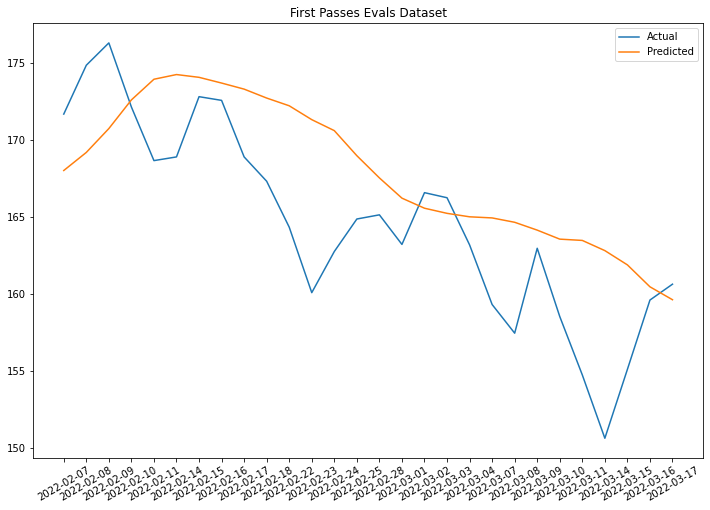

In [92]:
#//***** 256 Layers 20 EPOCHS -- LB 10 == Size 120 - Model Months: 7 - activation: relu
print("Run Time: ", total_time, "s")
print("Total Models: ", max_loop)
print(mp)
plt.figure(figsize=(12,8))

plt.plot(actuals, label="Actual")
plt.plot(predictions, label="Predicted")
plt.xticks(ticks=range(len(actuals)),labels=predict_date, rotation = 30)
plt.legend()
plt.title("First Passes Evals Dataset")

Run Time:  385 s
Total Models:  27
{'size': 120, 'lb': 10, 'layers': 256, 'epochs': 100, 'months_to_model': 7, 'activation': 'relu'}


Text(0.5, 1.0, 'First Passes Evals Dataset')

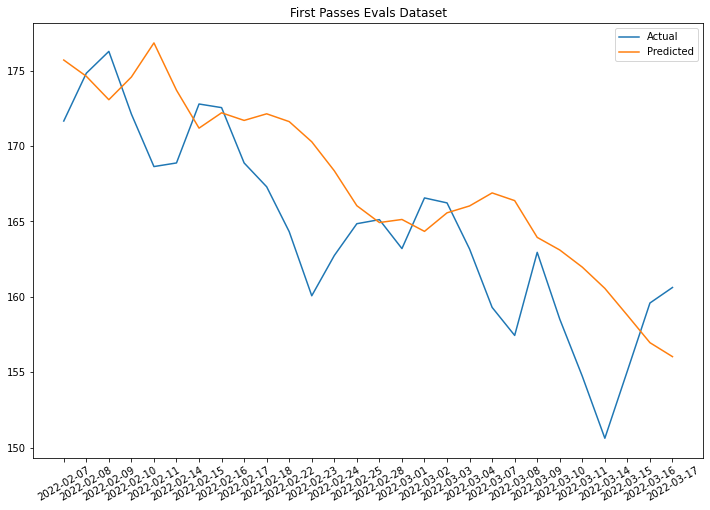

In [94]:
#//***** 256 Layers 100 EPOCHS -- LB 10 == Size 120 - Model Months: 7 - activation: relu
print("Run Time: ", total_time, "s")
print("Total Models: ", max_loop)
print(mp)
plt.figure(figsize=(12,8))

plt.plot(actuals, label="Actual")
plt.plot(predictions, label="Predicted")
plt.xticks(ticks=range(len(actuals)),labels=predict_date, rotation = 30)
plt.legend()
plt.title("First Passes Evals Dataset")

Run Time:  1026 s
Total Models:  27
{'size': 120, 'lb': 10, 'layers': 256, 'epochs': 300, 'months_to_model': 7, 'activation': 'relu'}


Text(0.5, 1.0, 'First Passes Evals Dataset')

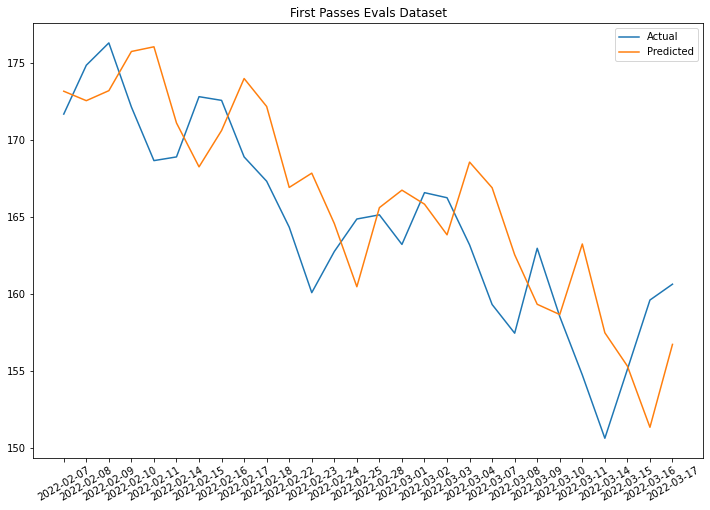

In [96]:
#//***** 256 Layers 300 EPOCHS -- LB 10 == Size 120 - Model Months: 7 - activation: relu
print("Run Time: ", total_time, "s")
print("Total Models: ", max_loop)
print(mp)
plt.figure(figsize=(12,8))

plt.plot(actuals, label="Actual")
plt.plot(predictions, label="Predicted")
plt.xticks(ticks=range(len(actuals)),labels=predict_date, rotation = 30)
plt.legend()
plt.title("First Passes Evals Dataset")

Run Time:  1398 s
Total Models:  27
{'size': 120, 'lb': 10, 'layers': 256, 'epochs': 500, 'months_to_model': 7, 'activation': 'relu'}


Text(0.5, 1.0, 'First Passes Evals Dataset')

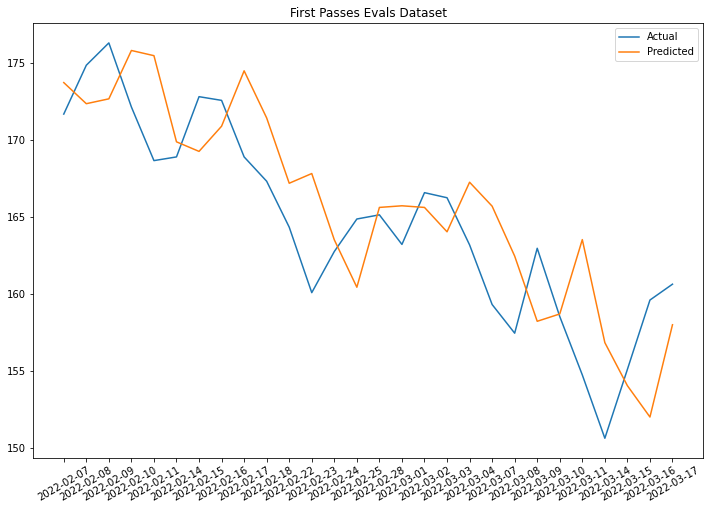

In [3]:
#//***** 256 Layers 500 EPOCHS -- LB 10 == Size 120 - Model Months: 7 - activation: relu
print("Run Time: ", total_time, "s")
print("Total Models: ", max_loop)
print(mp)
plt.figure(figsize=(12,8))

plt.plot(actuals, label="Actual")
plt.plot(predictions, label="Predicted")
plt.xticks(ticks=range(len(actuals)),labels=predict_date, rotation = 30)
plt.legend()
plt.title("First Passes Evals Dataset")